In [129]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [130]:
#read data using pandas
url = r'C:\Users\goura\Downloads\titanic_train.csv'
titanic_data  = pd.read_csv(url)

In [131]:
#check starting 5 rows
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
#check null values in this data frame
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
# rull values find in 3 columns
# drop Cabin column in this data frame as it won’t be of much importance
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [134]:
#fill null values in columns
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [135]:
titanic_data.describe()#Desctibe data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
titanic_data.columns#check columns in this data frame

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [137]:
#count of number of survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

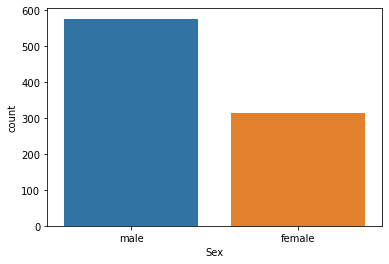

In [138]:
sns.countplot(titanic_data['Sex'])

In [139]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

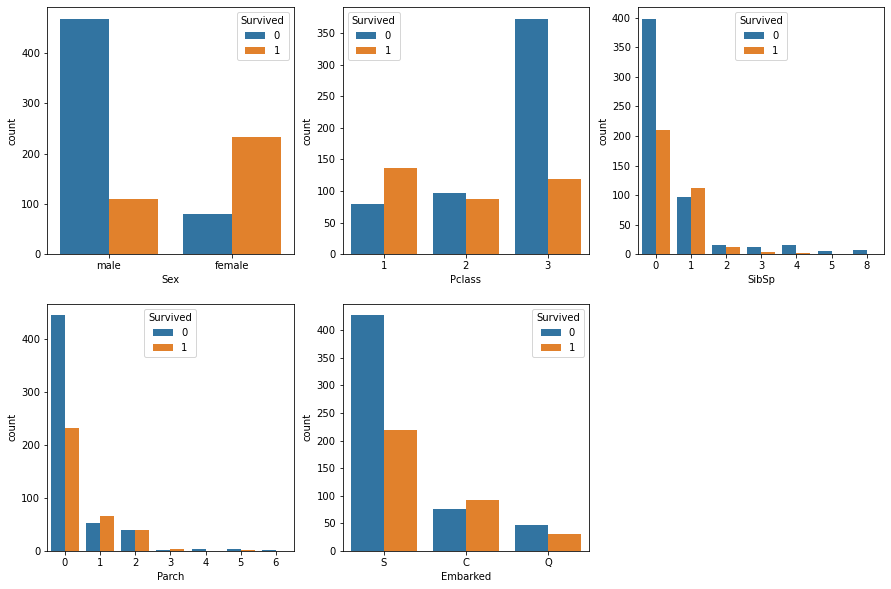

In [140]:
#plot list Sex,Pclass,SibSp,Parch,Embarked vs  Survived
cols=['Sex','Pclass','SibSp','Parch','Embarked']

plt.figure(figsize=(15,10))

for r in range(5):
        plt.subplot(2,3,r+1)
        sns.countplot(titanic_data[cols[r]],hue=titanic_data['Survived'])


In [141]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [142]:
# chek survival rate sex and class

titanic_data.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Sex'>

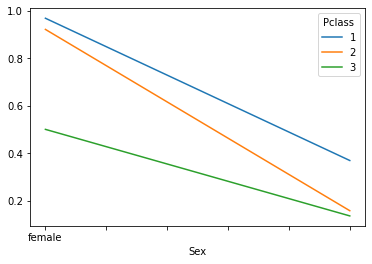

In [143]:
# chek survival rate sex and class

titanic_data.pivot_table('Survived',index='Sex',columns='Pclass').plot()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

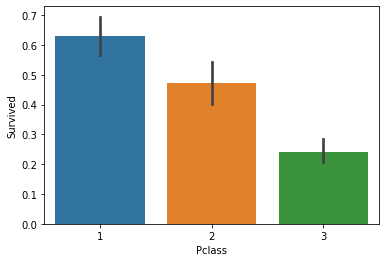

In [144]:
#plot survival rate of each class
sns.barplot(x='Pclass',y='Survived',data=titanic_data)

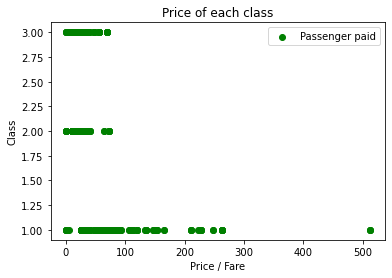

In [145]:
#plot price paid of each class
plt.scatter(titanic_data['Fare'],titanic_data['Pclass'],color='green', label='Passenger paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of each class')
plt.legend()

In [146]:
#drop columns because not need this columns
titanic_data = titanic_data.drop(['PassengerId','Name','Ticket'],axis=1)

In [147]:
# check datatype
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [148]:
#replace value sex column and embarked column
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [149]:
# check datatype
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

# Split The data

In [156]:
X = titanic_data.iloc[:,1:8].values
Y = titanic_data.iloc[:,0].values

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [158]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Normalization

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(X_train)
new_Xtrain = norm_fit.transform(X_train)
new_Xtest = norm_fit.transform(X_test)

# display values
print(f'new xtest = {new_Xtrain}')

new xtest = [[0.         0.         0.56078209 ... 0.         0.0541074  0.5       ]
 [1.         1.         0.05072258 ... 0.16666667 0.03259623 0.        ]
 [1.         0.         0.65996033 ... 0.         0.01756683 0.        ]
 ...
 [0.         0.         1.         ... 0.         0.09662576 0.5       ]
 [0.         0.         0.4148359  ... 0.         0.43288417 0.        ]
 [0.         0.         0.4148359  ... 0.         0.05060223 0.        ]]


In [87]:
X_train = new_Xtrain
X_test = new_Xtest

# Applying Model

In [47]:
# Algorithms

In [77]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,classification_report

# Stochastic Gradient Descent (SGD)

In [104]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)
# check model score
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

#check mean sqare error
SGD_mse = mean_squared_error(Y_pred,Y_test)
#root mean squared error
SGD_rmse = np.sqrt(SGD_mse)

#print score of model , mean suared error , root mean square score and classification report
print(f'score of model is : {acc_sgd}')#print model score
print('mean squared error is : ',SGD_mse)#print mean squared error
print(f'root mean squared error is : {SGD_rmse}\n')#print root mean squared error
print(classification_report(Y_test, Y_pred))


score of model is : 78.79
mean squared error is :  0.27932960893854747
root mean squared error is : 0.52851642258169

              precision    recall  f1-score   support

           0       0.67      0.98      0.80       100
           1       0.94      0.39      0.55        79

    accuracy                           0.72       179
   macro avg       0.81      0.69      0.68       179
weighted avg       0.79      0.72      0.69       179



# Random Forest:

In [108]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

#check mean sqare error
RF_mse = mean_squared_error(Y_pred,Y_test)
#root mean squared error
RF_rmse = np.sqrt(SGD_mse)

#print score of model , mean suared error , root mean square score 
print(f'score of model is : {acc_random_forest}')#print model score
print('mean squared error is : ',RF_mse)#print mean squared error
print(f'root mean squared error is : {RF_rmse}\n')#print root mean squared error

score of model is : 98.6
mean squared error is :  0.27932960893854747
root mean squared error is : 0.52851642258169



# Logistic Regression:

In [109]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

#check mean sqare error
LR_mse = mean_squared_error(Y_pred,Y_test)
#root mean squared error
LR_rmse = np.sqrt(SGD_mse)

#print score of model , mean suared error , root mean square score 
print(f'score of model is : {acc_log}')#print model score
print('mean squared error is : ',LR_mse)#print mean squared error
print(f'root mean squared error is : {LR_rmse}\n')#print root mean squared error

score of model is : 81.46
mean squared error is :  0.2346368715083799
root mean squared error is : 0.52851642258169



# Perceptron:    

In [110]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

#check mean sqare error
P_mse = mean_squared_error(Y_pred,Y_test)
#root mean squared error
P_rmse = np.sqrt(SGD_mse)

#print score of model , mean suared error , root mean square score 
print(f'score of model is : {acc_perceptron}')#print model score
print('mean squared error is : ',P_mse)#print mean squared error
print(f'root mean squared error is : {P_rmse}\n')#print root mean squared error

score of model is : 81.46
mean squared error is :  0.21787709497206703
root mean squared error is : 0.52851642258169



# Gaussian Naive Bayes:

In [111]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)


#check mean sqare error
GNB_mse = mean_squared_error(Y_pred,Y_test)
#root mean squared error
GNB_rmse = np.sqrt(SGD_mse)

#print score of model , mean suared error , root mean square score 
print(f'score of model is : {acc_gaussian}')#print model score
print('mean squared error is : ',GNB_mse)#print mean squared error
print(f'root mean squared error is : {GNB_rmse}\n')#print root mean squared error

score of model is : 79.35
mean squared error is :  0.24022346368715083
root mean squared error is : 0.52851642258169



# Decision Tree

In [116]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)


#check mean sqare error
DT_mse = mean_squared_error(Y_pred,Y_test)
#root mean squared error
DT_rmse = np.sqrt(SGD_mse)

#print score of model , mean suared error , root mean square score 
print(f'score of model is : {acc_decision_tree}')#print model score
print('mean squared error is : ',DT_mse)#print mean squared error
print(f'root mean squared error is : {DT_rmse}\n')#print root mean squared error


score of model is : 98.6
mean squared error is :  0.2737430167597765
root mean squared error is : 0.52851642258169



# Which is the best Model ?

In [113]:
results = pd.DataFrame({
    'Model': ['Stochastic Gradient Descent (SGD)','Random Forest','Logistic Regression','Perceptron','Gaussian Naive Bayes','Decision Tree'],
    'Score': [acc_sgd,acc_random_forest,acc_log,acc_perceptron,acc_gaussian,acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(6)

,Model
Score,
98.60,Random Forest
98.60,Decision Tree
81.46,Logistic Regression
81.46,Perceptron
79.35,Gaussian Naive Bayes
78.79,Stochastic Gradient Descent (SGD)


In [117]:
#Random Forest is best model


# Save Best Model

In [120]:
import pickle
#save model Random Forest
file = 'Titanic'
#save file
save = pickle.dump(random_forest,open(file,'wb'))

In [126]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80555556 0.90277778 0.85915493 0.84507042 0.85915493 0.8028169
 0.76056338 0.81690141 0.76056338 0.81690141]
Mean: 0.8229460093896714
Standard Deviation: 0.042483691936889806


# Feature Importance

In [192]:
ind = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']

In [194]:
importances = pd.DataFrame({'feature':ind,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.276
Fare,0.268
Age,0.253
Pclass,0.072
SibSp,0.055
Parch,0.043
Embarked,0.033


<AxesSubplot:xlabel='feature'>

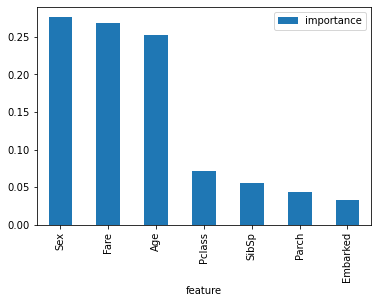

In [200]:

importances.plot.bar()

# Further Evaluation

In [202]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[388,  61],
       [ 82, 181]], dtype=int64)

# Precision and Recall:

In [203]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7479338842975206
Recall: 0.688212927756654


# F-Score

In [204]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)


0.7168316831683169

# Precision Recall Curve

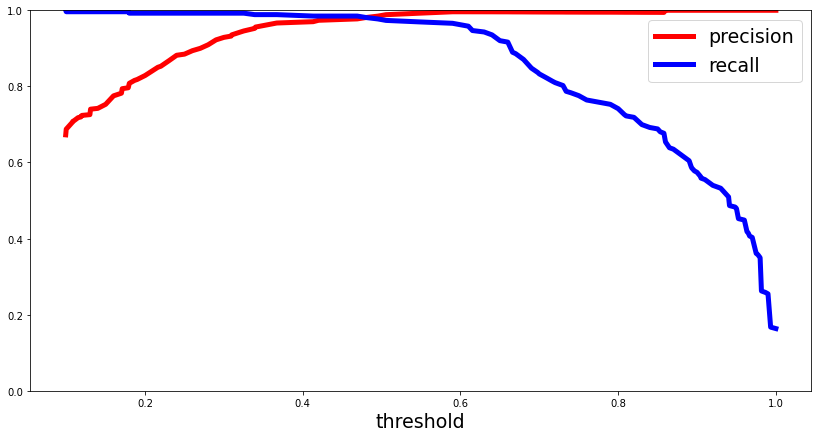

In [205]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [206]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.997400221870316
